# Manipulações Básicas com OpenCV

Com uma licensa totalmente livre para uso acadêmico e comercial, o **OpenCV** (Open Source Computer Vision Library) é uma biblioteca *open source* para **Visão Computacional** e **Machine Learning**. O OpenCV foi desenvolvida pela Intel para facilitar uma infraestrutura comum para aplicações de Visão Computacional e acelerar o uso de percepcão de máquinas em produtos comerciais.

<p align="center"><img src="https://miro.medium.com/max/3200/0*7s3HcYYvpnUhzDkG.png" width="60%"></p>

Empresas de todos os tamanhos utilizam OpenCV em sua stack, como Google, Yahoo, Microsoft, Intel, IBM, Sony, Honda, Toyota, além de startups como Applied Minds, VideoSurf, and Zeitera.

# 1.0 - Começando o Projeto:

Para começarmos um projeto envolvendo Análise de dados ou Ciência de Dados, comumente importamos bibliotecas como `numpy` e `matplotlib.pyplot`. Não diferente, essas bibliotecas são importadas aqui tambem devido à facilidade de se manipular os arrays e outras partes gráficas.

O OpenCV até então está na sua versão 4.1.2 e ela é importada como `cv2`. Outro detalhe que deve-se atentar é que **dentro do Google Colab é necessário importar um patch para corrigir as incompatibilidades do imshow.**

In [1]:
# Importando as bibliotecas:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## 1.1. Instruções Iniciais Sobre Imagens:

### 1.1.1. O que são Pixels?

O pixel é o menor dispositivo de uma exibição de uma tela digital. Uma tela 4k de possui 3840 pixels por 2160 pixels, que totalizam 8.294.400 pixels. Cada Pixel representa uma cor e, essa cor é composta por três canais de cores: vermelho, verde e azul (red, green e blue - RGB). ([DataHackers](http://datahacker.rs/opencv-manipulating-image-pixel/)).

Cada canal de cor **armazena a intensidade da cor em uma variável de 8 bits**, isso é, há 256 intensidades possíveis de vermelho, 256 para o canal azul e 256 para o canal verde ([DataHackers](http://datahacker.rs/opencv-manipulating-image-pixel/)). Com cada canal armazenando as informações em 8 bits, pode-se criar $256 \cdot 256 \cdot 256 = 16.777.216$ combinações de canais para formar uma cor para um único pixel ([Stanford](https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html])).

<p align="center"><img src="https://ai.stanford.edu/~syyeung/cvweb/Pictures1/colorpixels.png" width="30%"></p>

No exemplo da imagem, temos um pixel com os valores [213, 60, 67], esse array significa que o pixel possui 213 de intensidade no canal vermelho (R), 60 no canal verde (G) e 67 no canal azul (B).

**Os pixels são indexados a partir do valor 0 até 255**. Para imagens com grayscale (escala cinza) é utilizado um canal de 0 a 255, sendo: 0 - preto e 255 - branco ([DataHackers](http://datahacker.rs/opencv-manipulating-image-pixel/)).



### 1.1.2. Sistema de Coordenadas nas Imagens:

<p align="center"><img src="https://ai.stanford.edu/~syyeung/cvweb/Pictures1/imagematrix.png" width="40%"></p>

Sendo assim, **cada imagem pode ser representada por uma matriz de pixels** e, no caso de imagens com canais RGB, são 3 matrizes de pixels ([Stanford](https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html])).

Os pixels nessas matrizes podem ser localizados segundo dois pontos de coordenadas (x,y), sendo "X" crescente para a direita e "Y" sendo crescente para baixo. Isto é, **o ponto (0,0) está localizado no canto superior esquerdo da imagem**. Se o valor de X e Y aumentarem os pontos se moverão para baixo e esquerda ([DataHackers](http://datahacker.rs/opencv-manipulating-image-pixel/)).

<p align="center"><img src="http://media5.datahacker.rs/2019/04/David-4.png" width="20%"></p>





### 1.1.3. Códigos Hexadecimais:

Outro ponto interessante que serve mais à titulo de curiosidade para esse notebook são os **códigos Hexadecimais comumente utilizados em Softwares de edição de imagem**. Os códigos de cores Hexadecimais é composto por seis digítos alfanuméricos. Por exemplo: #8745EF.

O **primeiro par de digitos são referentes ao canal vermelho, o segundo par de digitos para o canal azul e o terceiro par de digito para o canal verde**. Isto é, no código Hexadecimal #8745EF: "87" que é o primeiro par de dígitos se refere ao canal vermelho; "45" para o verde; "EF" para o azul. ([André Rafael](https://medium.com/origamid/cores-em-hexadecimal-memor%C3%A1veis-cc939511753c))

Mas como que funciona essa mistura entre letras e números? O Código Hexadecimal (16) possui uma intensidade de cor que vai de 00 a FF. 00 signfica que a cor está completamente apagada e FF completamente acesa (255). Um código **#FF00FF indica que o canal vermelho e azul estão acesso**, retornando a cor roxa. ([André Rafael](https://medium.com/origamid/cores-em-hexadecimal-memor%C3%A1veis-cc939511753c))

Mas por que temos números e letras? Hexadecimal representa 16, então precisamos de 16 caracteres que irão formar o valor final da cor. ([André Rafael](https://medium.com/origamid/cores-em-hexadecimal-memor%C3%A1veis-cc939511753c))

<p align="center"><img src="https://miro.medium.com/max/564/1*9hCwFXgbtI5FeQFHFIQL-Q.png" width="80%"></p>

A conversão do Hexadecimal para a base Decimal se dá pela formula simplificada: 

$(PrimeiroCaractere \cdot 16) + (SegundoCaractere)$.

Logo, o código 4F seria equivalente a:

$(5 \cdot 16) + 16 = 96$

## 1.2. Padrões OpenCV:

### 1.2.1. Padrões de leitura de imagem:

A função responsável pela leitura das imagens [`imread`](https://docs.opencv.org/4.5.2/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) apresenta a seguinte observação:

`In the case of color images, the decoded images will have the channels stored in B G R order.`

A frase a cima indica que **em caso de imagens coloridas, as imagens decodificadas na ordem B G R** e não no padrão RGB.

Para fazer as leituras dos arquivos dentro OpenCV se dá de forma bastante similar com a biblioteca Pandas, com a função `cv2.imread()` e para mostrar a imagem `cv2_imshow`:

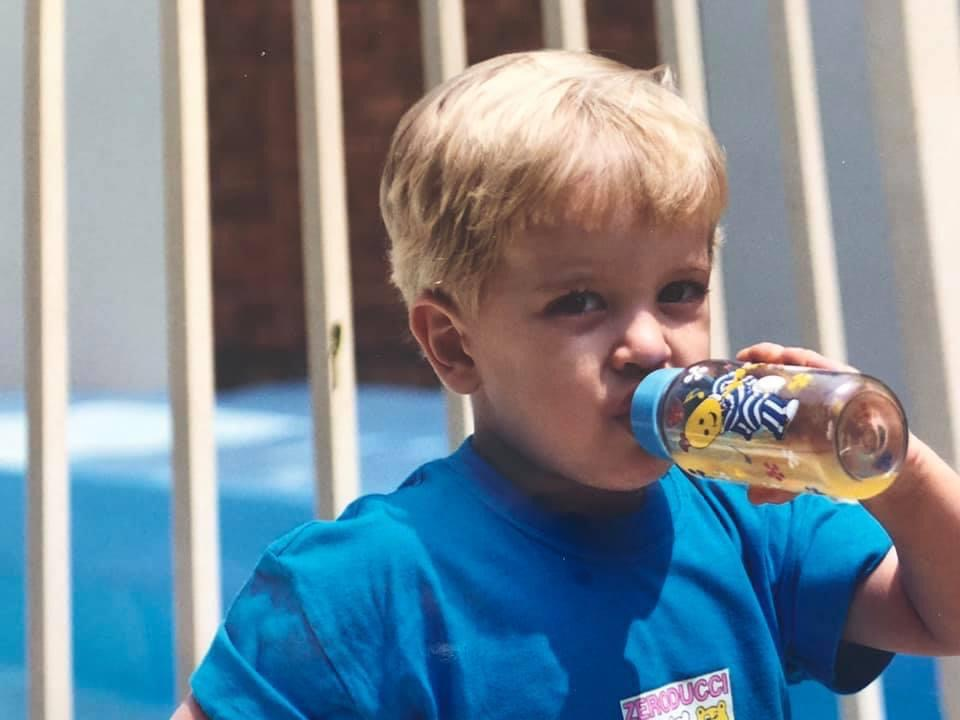

(720, 960, 3)


In [2]:
import requests

# Baixa a foto do Github:
DownURL = 'https://github.com/GabrielTrentino/Bootcamps-Masterclass/blob/main/02%20-%20Masterclass/02.1%20-%20SIGMOIDAL%20-%20Vis%C3%A3o%20Computacional/Filtros%20no%20StreamLit/Baby.JPG?raw=true'
img_data = requests.get(DownURL).content
with open('baby.jpg', 'wb') as handler:
    handler.write(img_data)

# Leitura da imagem:
image = cv2.imread("baby.jpg")

# Mostrar a figura no Google Colab:
cv2_imshow(image)

# Mostra o Shape da Imagem:
print(image.shape)

Note que o **Shape da Imagem** retorna uma Tupla com a **quantidade de linhas, colunas dos pixels e a quantidade dos canais**, no caso BGR.

### 1.2.2. Conversões e leituras em imagem (`cv2.imread(imagem, conversão)`):

Para isso, caso haja interesse me modificar a forma de decodificação dos canais presentes na imagem, deve-se utilizar alguma das principais conversões abaixo:

- **`cv2.IMREAD_COLOR`** - 3 canais de cores (BGR), com 8-bit value (0-255)
- **`cv2.IMREAD_GRAYSCALE`** - 8-bit grayscale image
- **`cv2.IMREAD_ANYCOLOR`** - Dependente do metadado da imagem. Pode retornar 8-bit por canal BGR ou 8-bit grayscale
- **`cv2.IMREAD_UNCHANGED`** - Lê todos os dados da image, incluindo o canal alpha, se existir.
- **`cv2.IMREAD_REDUCED_GRAYSCALE_2 / 4 / 8`** - Carrega uma imagem na metade da resolução original, em grayscale
- **`cv2.IMREAD_REDUCED_COLOR_2  / 4 / 8`** - Carrega uma imagem na metade da resolução original, em BGR.

## 1.3. Splits de canais e Merge de Canais:

Como dito anteriormente, o Open CV realiza as leituras das imagens através dos três canais de cores BGR, para obter o array equivalente de cada canal, é utilizado a função `cv2.split(image)` que retorna uma tupla. A tupla retornada contêm três elementos que correspondem aos canais BGR respectivamente.

In [3]:
# Split
(b, g, r) = cv2.split(image)
print(b)

[[196 196 196 ... 194 184 177]
 [196 196 196 ... 194 184 177]
 [196 196 196 ... 194 184 177]
 ...
 [198 199 199 ... 145 147 147]
 [198 199 199 ... 145 145 145]
 [198 199 199 ... 145 145 145]]


Em contra partida, para juntar canais de cores é utilizada a função `cv2.merge((b,g,r))`

In [4]:
# Merge
image_copy = cv2.merge((b,g,r))
print(image_copy.shape)

(720, 960, 3)


# 2.0 Manipulações de Imagem:

Inicializando os processos de Manipulações de Imagens, essa secção tem como finalidade demonstrar os básicos da manipulação das imagens dentro do OpenCv, entre elas: Redimensionamento das fotos, Translação, Rotação e Cortes.

## 2.1. Redimensionamento de Imagens por Escala e Ratio

Para redimensior as imagens com o OpenCV é utilizado a função `cv2.resize()`, essa função pode redimensionar as imagens por **valores absolutos** (converter uma imagem de 2000 x 300 pixels) ou por **fatores multiplicativos** (fx e fy).

A função é utilizada da seguinte forma: `cv2.resize(src, dsize, interpolation)` ([Link da Biblioteca](https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/)). O argumento `src` é a imagem à ser modificada; `dsize` é o tamanho desejado de saída da imagem; `interpolation` é como os pixels da imagem serão trabalhados em momentos de preenchimento ou sobreposição, entre as possibilidades de interpolação estão:

* `INTER_NEAREST` – Interpolação dos Pixels através de vizinhos próximos. Isto é, lacunas de pixels são preenchidas copiando pixels adjacentes;
* `INTER_LINEAR` – Interpolação Bilinear comumente utilizada (e utilizada por default) ([link](https://www.ehow.com.br/diferencas-entre-bicubico-bilinear-info_340375/)); 
* `INTER_AREA` – Reamostragem dos pixels utilizando a relação da área do pixel ([link](https://medium.com/@wenrudong/what-is-opencvs-inter-area-actually-doing-282a626a09b3));
* `INTER_CUBIC` – Interpolação Bicubica sobre uma matriz vizinha próxima de 4x4; 
* `INTER_LANCZOS4` – Interpolação Lanczos sobre uma matriz vizinha próxima 8x8;

No primeiro redimensionamento de imagem foi utilizado a redimensão por valores absolutos, a imagem de 720x960 foi redimensionada para 2000x300. No segundo momento, o redimensionamento se dará pela proporção dos pixels nas linhas e colunas (fx e fy).

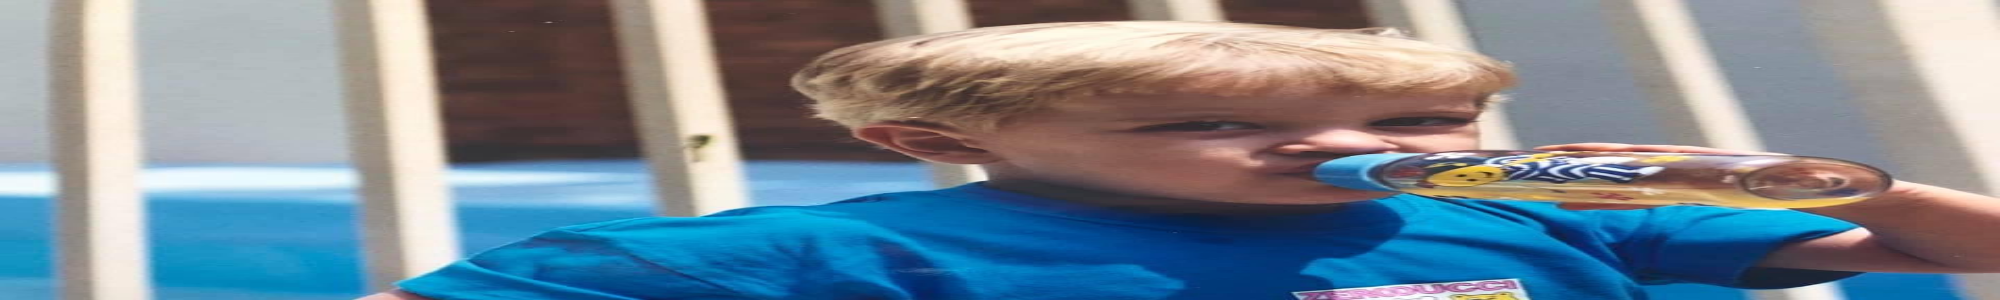

(300, 2000, 3)


In [5]:
# valores absolutos
resized_image = cv2.resize(image, (2000, 300), interpolation=cv2.INTER_LINEAR)
cv2_imshow(resized_image)
print(resized_image.shape)

Com o redimensionamento utilizando valores absolutos, em seguida é feito o redimensionamento pela proporção da imagem, no caso, uma proporção de 30% do tamanho original tanto para a quantidade de linhas quanto pela quantidade de colunas.

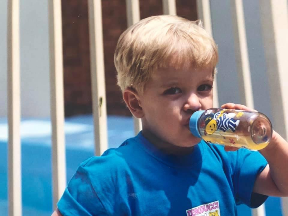

(216, 288, 3)


In [6]:
# Ratio
dst_image = cv2.resize(image, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_LINEAR)
cv2_imshow(dst_image)
print(dst_image.shape)

## 2.2. Movimentações:

Continuando o Tópico envolvendo manipulações de imagens, os próximos passos envolvem a disposição dos pixels na imagem, que envolvem técnicas como: Translação, Rotação e Cropping (Corte).

Para isso, nesse primeiro momento é feito a releitura da imagem no Open CV para descartar qualquer modificação feita anteriormente.


In [7]:
# Relendo a imagem "baby.jpg":
image = cv2.imread("baby.jpg", cv2.IMREAD_REDUCED_COLOR_2)
image = cv2.resize(image, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_LINEAR)
print(image.shape)

(108, 144, 3)


### 2.2.1 Translação:

A translação das imagens nada mais são que a adição de um Vetor em relação à imagem. O Vetor fará com que a imagem se desloque na direção, modulo e sentido desse Vetor. Por exemplo, o triangulo ABC ao ser somado com o Vetor, ele será transladado, formando o triangulo A'B'C' da imagem ([Krista King](https://www.kristakingmath.com/blog/translation-vectors-to-translate-a-figure))

<p align="center"><img src="https://images.squarespace-cdn.com/content/v1/533db07de4b0d9f7ba7f1e77/1556033008240-ARALGBRQIHJKVVYTSRS9/ke17ZwdGBToddI8pDm48kDnS1hiqVLL9MRhOc2XlPkYUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKc0SNtdxrCQuK4QXKqq5vZsV6KMHrUdwGy8U9OnJyinYu4DsGiJ8SIVuuph5TPJUcH/The+triangle%27s+image+after+the+translation?format=750w" width="40%"></p>

Tanto para transladar quanto para rotacionar a imagem, é utilizada a função `cv2.warpAffine` ([link da biblitoeca](https://docs.opencv.org/master/d4/d61/tutorial_warp_affine.html)).

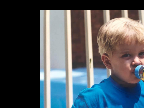

In [8]:
# Obtendo a largura e altura:
height, width = image.shape[:2]

# Gerando O vetor à ser adicionado:
M = np.float32([[1, 0, 40], [0, 1, 10]])

# Transladando a Imagem:
dst_image = cv2.warpAffine(image, M, (width, height))
cv2_imshow(dst_image)

### 2.2.2. Rotação:

Diferente da Translação que á uma adição vetorial, a Rotação passa por um transformação Linear dos pixels da imagem ao utilizar `cv2.getRotationMatrix2D` e `cv2.warpAffine` ([link da biblitoeca](https://docs.opencv.org/master/d4/d61/tutorial_warp_affine.html)).

A função `getRotationMatrix2D` recebe três argumentos: O Centro de rotação, o angulo da rotação e a proporção da escala. No caso do Centro de Rotação é passada uma Tupla com o centro da imagem (metade da largura e metade de altura).

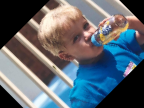

In [9]:
# Obtendo a Altura e Largura da Imagem:
height, width = image.shape[:2]

# Centro, Angulo e Escala
M = cv2.getRotationMatrix2D((width / 2.0, height / 2.0), 45, 1)

# Rotacionando a Imagem:
dst_image = cv2.warpAffine(image, M, (width, height))
cv2_imshow(dst_image)

### 2.2.3. Cropping:

O Cropping ou Corte acaba sendo mais simples que os outros métodos citados anteriormente, pois são selecionados apenas os pixels nas dimensões e os canais de cores.

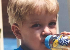

In [10]:
cropped_image = image[20:70, 50:120, :]
cv2_imshow(cropped_image)

# 3.0. Criando Imagens dentro de Imagens:

## 3.1. Criando imagens com Array do Numpy:

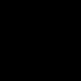

In [11]:
# criar uma imagem
caixa = np.zeros((81,81), dtype=np.uint8)
cv2_imshow(caixa)

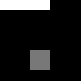

In [12]:
caixa[0:10, 0:50] = 255
caixa[50:70, 30:50] = 120
cv2_imshow(caixa)

## 3.2. Criando Figuras Geométricas:

https://docs.opencv.org/4.5.2/dc/da5/tutorial_py_drawing_functions.html

Cria uma imagem de 256 por 256 pixels com 3 canais de cores. Todos os valores são 0 isto é, preto.

Escreve uma linha da coordenada (0,0) até (255, 255) da cor (255, 0 ,0) com espessura de 3 pixels.

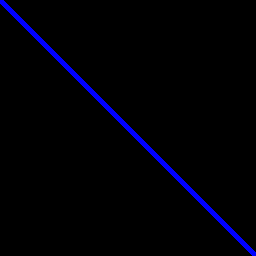

In [13]:
# 
img = np.zeros((256,256,3), np.uint8)

# 
cv2.line(img,(0,0),(255,255),(255,0,0),3)
cv2_imshow(img)

Cria um retangulo do Pixel (140, 0) até o pixel (200,60) com a cor (0, 255, 0) - verde e espessura de 2.

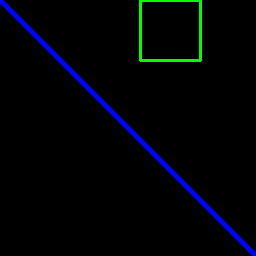

In [14]:
# 
cv2.rectangle(img,(140,0),(200,60),(0,255,0),2)
cv2_imshow(img)

Cria um círculo no centro (170, 30) com raio de 30 na cor (0, 0, 255) - vermelho. Valores negativos (-1) fazem o preenchimento da área, enquanto valores >= 0 gera apenas o traço da circuferência.

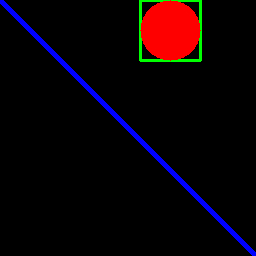

In [15]:
# 
cv2.circle(img,(170,30), 30, (0,0,255), -1)
cv2_imshow(img)

Cria uma elipse no ponto (127, 127) com raio horizontal 90 e vertical 30. Inclinação de 10. Grau inicial de 0 e grau final de 270 na cor (0, 255, 255) amarelo. O argumento -1 preenche a área da elipse.

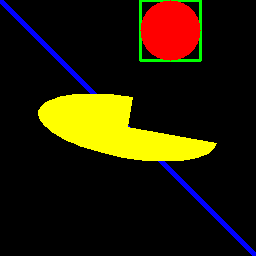

In [16]:
# 
cv2.ellipse(img,(127,127),(90,30),10, 0,270,(0,255, 255),-1)
cv2_imshow(img)

Cria Poligonos ao determinar os pontos:
Na cor (255, 127, 255) Rosado.

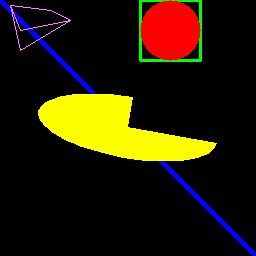

In [17]:
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(255,127,255))
pts = np.array([[10,5],[20,50],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(255,127,255))
cv2_imshow(img)

## 3.3. Delimitando imagem com Retangulos: 



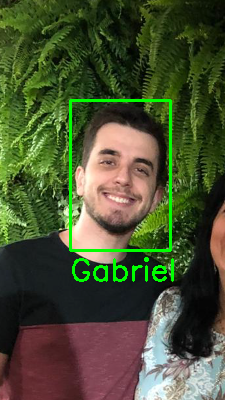

In [18]:
# Baixa a foto do Github:
DownURL = 'https://github.com/GabrielTrentino/Bootcamps-Masterclass/blob/main/02%20-%20Masterclass/02.1%20-%20SIGMOIDAL%20-%20Vis%C3%A3o%20Computacional/Imagens/img1.PNG?raw=true'
img_data = requests.get(DownURL).content
with open('img1.jpg', 'wb') as handler:
    handler.write(img_data)

img1 = cv2.imread("img1.jpg")
img1 = cv2.resize(img1, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_LINEAR)

img_cp = img1.copy()

cv2.rectangle(img_cp, (70, 100), (170, 250), (0, 255, 0), 2)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2_imshow(cv2.putText(img_cp, 'Gabriel', (70, 280), font, 1, (0, 255, 0), 2))

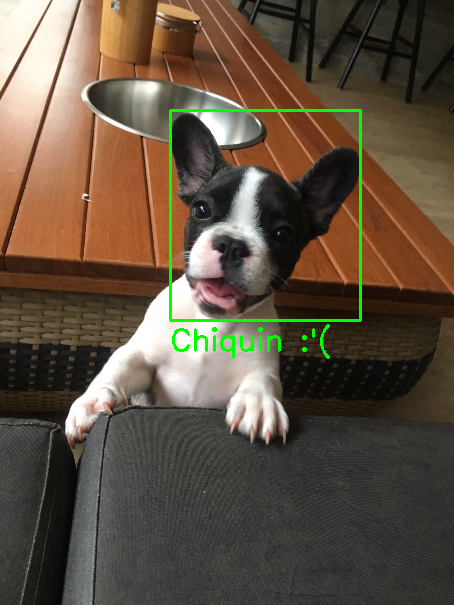

In [19]:
# Baixa a foto do Github:
DownURL = 'https://github.com/GabrielTrentino/Bootcamps-Masterclass/blob/main/02%20-%20Masterclass/02.1%20-%20SIGMOIDAL%20-%20Vis%C3%A3o%20Computacional/Imagens/img2.JPG?raw=true'
img_data = requests.get(DownURL).content
with open('img2.jpg', 'wb') as handler:
    handler.write(img_data)

img2 = cv2.imread("img2.jpg")
img2 = cv2.resize(img2, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_LINEAR)

img_cp = img2.copy()

cv2.rectangle(img_cp, (170, 110), (360, 320), (0, 255, 0), 2)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2_imshow(cv2.putText(img_cp, "Chiquin :'(", (170, 350), font, 1, (0, 255, 0), 2))

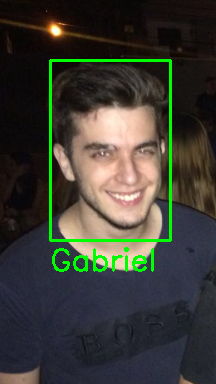

In [20]:
DownURL = 'https://github.com/GabrielTrentino/Bootcamps-Masterclass/blob/main/02%20-%20Masterclass/02.1%20-%20SIGMOIDAL%20-%20Vis%C3%A3o%20Computacional/Imagens/img3.PNG?raw=true'
img_data = requests.get(DownURL).content
with open('img3.jpg', 'wb') as handler:
    handler.write(img_data)

img3 = cv2.imread("img3.jpg")
img3 = cv2.resize(img3, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_LINEAR)

img_cp = img3.copy()

cv2.rectangle(img_cp, (50, 60), (170, 240), (0, 255, 0), 2)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2_imshow(cv2.putText(img_cp, 'Gabriel', (50, 270), font, 1, (0, 255, 0), 2))

## 3.4. Bitwise Operations:

https://docs.opencv.org/4.5.2/d0/d86/tutorial_py_image_arithmetics.html

https://analyticsindiamag.com/how-to-implement-bitwise-operations-on-images-using-opencv/

### 3.4.1. Bitwise AND:

### 3.4.2. Bitwise OR:

# 4.0 Filtros e Operações Aritméticas:

## 4.1. Operações Aritméticas:

### 4.1.1 Clareando Imagens:

### 4.1.2. Escurecendo Imagens:

## 4.2. Blurs:

### 4.2.1. Gaussian Blur:

### 4.2.2. Motion Blur:

## 4.3. Sharpening:

## 4.4. Filtros do Instagram:

## 4.4.1. Sépia:

### 4.4.2. Sketch:

### 4.4.3. Canny Edges:

# 5.0. Transformações Morfológicas:

https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html

https://www.geeksforgeeks.org/top-hat-and-black-hat-transform-using-python-opencv/

## 5.1. Erosão:



## 5.2. Dilatação:

## 5.3. Abertura (Opening):

## 5.4. Fechamento (Closing):

## 5.5. Morphological Gradient:

## 5.6. Top Hat:

## 5.7. Black Hat:

# Outros codigos:

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow